In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
%matplotlib inline

In [3]:
df = pd.read_csv('./Reviews.csv')
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [27]:
df[df['UserId'] == 'A3OXHLG6DIBRW8']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness_ratio
369,370,B002O3VHXU,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",1,1,5,1282176000,Very Smooth Coffee - Highly Recommended,"Green Mountain ""Nantucket Blend"" K-Cups make a...",1.000000
813,814,B004ET7MG8,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",3,4,2,1272240000,Odd Fake Flavor - Not Recommended,"Trident ""Strawberry Twist"" sugarless gum is ve...",0.750000
3306,3307,B005K4Q1VI,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",24,25,5,1321401600,Really Good Hot Cocoa - Highly Recommended,These Grove Square Hot Cocoa flavors are by fa...,0.960000
3416,3417,B005K4Q1VI,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",5,5,5,1321401600,Really Good Hot Cocoa - Highly Recommended,These Grove Square Hot Cocoa flavors are by fa...,1.000000
3926,3927,B000VSDFRG,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",2,2,5,1237161600,Great Diabetic Friendly Candy - Highly Recomme...,"Hershey ""Sugar Free Caramel Filled Chocolates""...",1.000000
6160,6161,B007J6GGII,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",0,0,4,1332633600,True Bacon Flavor,"These David's Signature Beyond Gourmet ""Bacon""...",NaN
7773,7774,B007J6KEPY,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",0,0,5,1332633600,Outstanding Flavor - Highly Recommended,"These David's Signature Beyond Gourmet ""Pomegr...",NaN
10715,10716,B00389Q4XW,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",0,0,4,1283126400,Good Hot Cocoa - Recommended,The Green Mountain Hot Cocoa is a good choice ...,NaN
15318,15319,B00503DP0O,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",0,0,4,1311897600,Very Good Tasting Snack Bars - Recommended,We have several relatives with dietary restric...,NaN
15792,15793,B007TJGZ5E,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",0,0,5,1282176000,Very Smooth Coffee - Highly Recommended,"Green Mountain ""Nantucket Blend"" K-Cups make a...",NaN


In [6]:
df['Helpfulness_ratio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
df['Helpfulness_ratio'].describe()

count    298402.000000
mean          0.776975
std           0.346321
min           0.000000
25%           0.600000
50%           1.000000
75%           1.000000
max           3.000000
Name: Helpfulness_ratio, dtype: float64

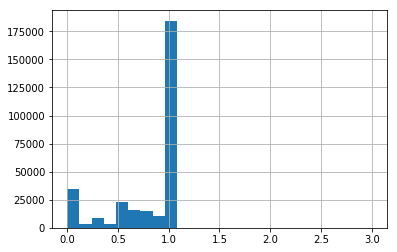

In [14]:
df['Helpfulness_ratio'].hist(bins=25)

Now that we have the data and the HelpfulnessRatio, we will plot the data to check the distribution. This will help in determining any possible outliers which wouldn't help on creating a predictive model and to clean the data. Another factor to consider is that the helpfulness ratio should not be a value greater than 1. If any data is found which this assertion does not apply, those datapoints will be take a closer look at and checked

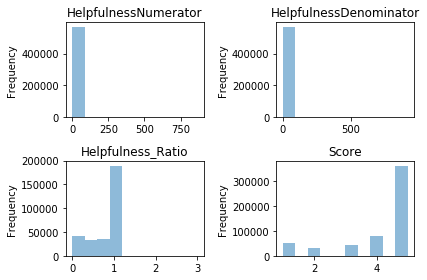

In [10]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
df['HelpfulnessNumerator'].plot.hist(alpha = 0.5)
ax1.set_title('HelpfulnessNumerator')

ax2 = fig.add_subplot(2,2,2)
df['HelpfulnessDenominator'].plot.hist(alpha = 0.5)
ax2.set_title('HelpfulnessDenominator')

ax3 = fig.add_subplot(2,2,3)
df['Helpfulness_ratio'].plot.hist(alpha=0.5)
ax3.set_title('Helpfulness_Ratio')

ax4 = fig.add_subplot(2,2,4)
df['Score'].plot.hist(alpha=0.5)
ax4.set_title('Score')

plt.tight_layout()
plt.show()


As seen above, the histograms for Helpfulness columns are not informative due to some outliers. For example, in the helpfulness Numerator graph, The max value is 886, but more than 75% of the data falls within the range 0 and 2. Same can be said for helpfulness denominator. In regards to the helpfulness ratio graph, there are values > 1.0, so definitely there are datapoints we need to observe deeper also. 

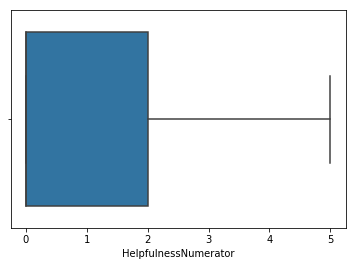

In [15]:
ax = sns.boxplot(x=df['HelpfulnessNumerator'], showfliers=False)
plt.show()

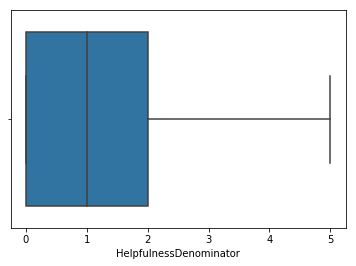

In [16]:
ax = sns.boxplot(x=df['HelpfulnessDenominator'], showfliers=False)
plt.show()

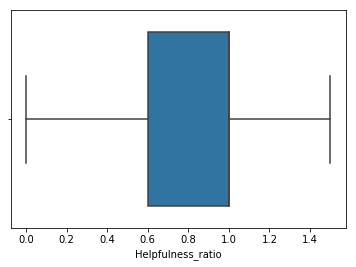

In [17]:
ax = sns.boxplot(x=df['Helpfulness_ratio'], showfliers=False)
plt.show()

In [18]:
print(df['HelpfulnessNumerator'].quantile([0.2,0.5,0.7, 0.8, 0.9, 0.995]))
print(df['HelpfulnessDenominator'].quantile([0.2,0.5,0.7, 0.8, 0.9, 0.995]))
print(df['Helpfulness_ratio'].quantile([0.2,0.5,0.7, 0.8, 0.9, 0.995]))

0.200     0.0
0.500     0.0
0.700     1.0
0.800     2.0
0.900     4.0
0.995    30.0
Name: HelpfulnessNumerator, dtype: float64
0.200     0.0
0.500     1.0
0.700     2.0
0.800     3.0
0.900     5.0
0.995    35.0
Name: HelpfulnessDenominator, dtype: float64
0.200    0.5
0.500    1.0
0.700    1.0
0.800    1.0
0.900    1.0
0.995    1.0
Name: Helpfulness_ratio, dtype: float64


In [19]:
Outlier = df[df['Helpfulness_ratio'] > 1.0]
Outlier.shape

(2, 11)

In [20]:
Outlier.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness_ratio
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...,1.5
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...,3.0


In [22]:
df = df.drop([44736,64421])

In [38]:
avg_score = df[['UserId','Score']].groupby('UserId').mean()

In [39]:
avg_score.head()

,Score
UserId,
#oc-R103C0QSV1DF5E,5.0
#oc-R109MU5OBBZ59U,5.0
#oc-R10LFEMQEW6QGZ,5.0
#oc-R10LT57ZGIB140,3.0
#oc-R10UA029WVWIUI,1.0


In [42]:
avg_score.reset_index()

,UserId,Score
0,#oc-R103C0QSV1DF5E,5.000000
1,#oc-R109MU5OBBZ59U,5.000000
2,#oc-R10LFEMQEW6QGZ,5.000000
3,#oc-R10LT57ZGIB140,3.000000
4,#oc-R10UA029WVWIUI,1.000000
5,#oc-R115TNMSPFT9I7,2.000000
6,#oc-R119LM8D59ZW8Y,1.000000
7,#oc-R11D9D7SHXIJB9,5.000000
8,#oc-R11D9LKDAN5NQJ,3.000000
9,#oc-R11DNU2NBKQ23Z,1.000000


In [43]:
avg_score.columns = ['avg_score']
tmp_df = pd.merge(df, avg_score.reset_index(), how='left', on='UserId')
tmp_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness_ratio,avg_score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,5.000000
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN,1.000000
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,4.333333
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,2.000000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,NaN,5.000000


In [47]:
tmp_df['Helpfulness_ratio'].isnull()

True

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tmp_df['normalized_score'] = scaler.fit_transform(tmp_df['avg_score'].values.reshape(-1,1))

In [53]:
tmp_df['normalized_score'] = tmp_df['Score'] - tmp_df['avg_score']

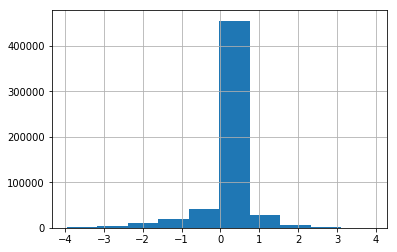

In [54]:
tmp_df['normalized_score'].hist()

Inferential statistics
Here we check if there any correlation between the helpfulness numerator and denominator to the actual score. What we will do is the following:

1. find the pearson correlation coefficient between helpfulness numerator and denominator to the Score.
2. Use hypothesis testing to test if this correlation value is significant.
3. The null hypothesis will be that there is no significant correlation between the variables.
4. We will use a permutation test to permute the helpfulness numerator/denominator values, and rerun the test.
5. Check the p-value of the observed correlation to the permutation samples, and check the significance.

In [62]:
def pearson(x,y):
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

In [63]:
cols = ['HelpfulnessNumerator','HelpfulnessDenominator']
dep = tmp_df[cols]
target = tmp_df['Score']

correlations = {}
for col in cols:
    x = dep[col].values
    y = target.values
#     print(pearson(x,y))
    correlations[col] = pearson(x,y)

for k, v in correlations.items():
    print(k, 'has a pearson correlation of', v, 'to the feature Score')

HelpfulnessNumerator has a pearson correlation of -0.032590266592659234 to the feature Score
HelpfulnessDenominator has a pearson correlation of -0.09798583906711082 to the feature Score


In [64]:
np.random.permutation(dep['HelpfulnessDenominator'].values)

array([2, 1, 0, ..., 6, 0, 1], dtype=int64)

In [67]:
#now we have the observed correlation, we will run permutation tests and resample
num_trials = 5000
trial_correlations = {}

for col in cols:
    corr_list = np.empty(num_trials)
    for i in range(num_trials):
        x = np.random.permutation(dep[col].values)
        y = target.values
        corr_list[i] = pearson(x,y)
    trial_correlations[col] = corr_list       

In [68]:
trial_correlations

{'HelpfulnessNumerator': array([-0.00075325, -0.00064532, -0.00020303, ...,  0.00047886,
         0.00142936,  0.00054092]),
 'HelpfulnessDenominator': array([-0.00156939,  0.002441  , -0.00099289, ...,  0.00159973,
         0.00255063,  0.00132347])}

In [70]:
conf_interval = 99
for k,v in trial_correlations.items():
    print(k, 'has range', np.percentile(v, [(100-conf_interval)/2, conf_interval + (100-conf_interval)/2]), 'with confidence level', conf_interval)

HelpfulnessNumerator has range [-0.00339375  0.00326662] with confidence level 99
HelpfulnessDenominator has range [-0.00349604  0.00334058] with confidence level 99


From the results, we see that the observed correlation is outside of the range of the tested correlation values, with a confidence interval of 99%. Hence we can conclude that there is some significance between the helpfuless numerator and denominator to the score. But the raw pearson correlation score is -0.0325 and -0.09 for helpfulness numerator and denominator respectively, and realistically does not add much values to the score.

In [72]:
#create the positive review column, then save out
tmp_df['positive_review'] = tmp_df['Score'] > 3

In [ ]:
tmp_df.to_csv('./review')